In [1]:
import nltk
nltk.download(["vader_lexicon"])
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED]
[nltk_data]     certificate verify failed: unable to get local issuer
[nltk_data]     certificate (_ssl.c:997)>


In [2]:
# TODO: for final version include this cell (and the imports) to the scripts

sia = SentimentIntensityAnalyzer()

def get_semantic_scores(text):
    return sia.polarity_scores(text)


# Function that adds semantic scores to one specified index (index) in data frame (df) to columns (column_names = [neg, neu, pos, compound])
def input_semantic_scores_to_df(df, index, column_names):
    scores = get_semantic_scores(df.iloc[index]["text"])
    semantic_labels = ["neg", "neu", "pos", "compound"]

    for i in range(len(scores)):
        df.at[index, column_names[i]] = scores[semantic_labels[i]]




In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Visual debuggin
df = pd.read_csv('../data/blogs_with_analytics.csv', delimiter='\t')

df["semantic neg score"] = -1.0
df["semantic neu score"] = -1.0
df["semantic pos score"] = -1.0
df["semantic compound score"] = 0.0
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    785 non-null    int64  
 1   Unnamed: 0               785 non-null    int64  
 2   url                      785 non-null    object 
 3   title                    785 non-null    object 
 4   time                     785 non-null    object 
 5   category                 785 non-null    object 
 6   description              778 non-null    object 
 7   text                     785 non-null    object 
 8   introduction             785 non-null    object 
 9   author                   785 non-null    object 
 10  author_job_title         785 non-null    object 
 11  pageviews                785 non-null    int64  
 12  unique_pageviews         785 non-null    int64  
 13  avg_time                 785 non-null    float64
 14  bounce_rate              7

In [5]:
# Counts scores for all the blogposts
for index in range(len(df)):
    if (index%10 == 0):
        print(index)
    input_semantic_scores_to_df(df, index, ["semantic neg score", "semantic neu score", "semantic pos score", "semantic compound score"])

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780


In [6]:
# Update the file
df.to_csv("../data/blogs_with_analytics.csv", sep='\t', index=False)

Rest of this file is just seeing the data visually (-> remove for final version)

In [7]:
df[["semantic neg score", "semantic neu score", "semantic pos score", "semantic compound score"]].describe()

,semantic neg score,semantic neu score,semantic pos score,semantic compound score
count,785.000000,785.000000,785.000000,785.000000
mean,0.031369,0.819611,0.148981,0.954184
std,0.021671,0.051437,0.048591,0.246510
min,0.000000,0.641000,0.000000,-0.997400
25%,0.016000,0.786000,0.114000,0.995300
50%,0.028000,0.820000,0.149000,0.998300
75%,0.043000,0.855000,0.181000,0.999400
max,0.193000,1.000000,0.359000,1.000000


<AxesSubplot:>

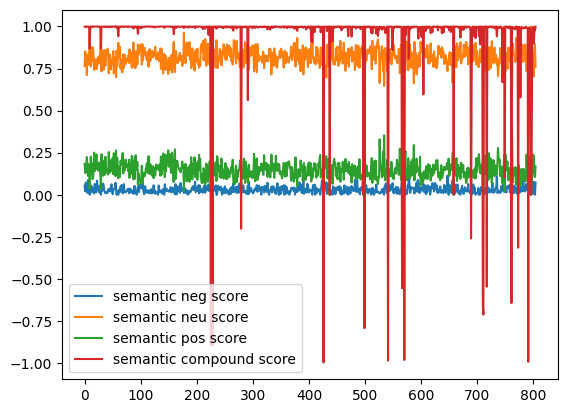

In [8]:
df[["semantic neg score", "semantic neu score", "semantic pos score", "semantic compound score"]].plot()

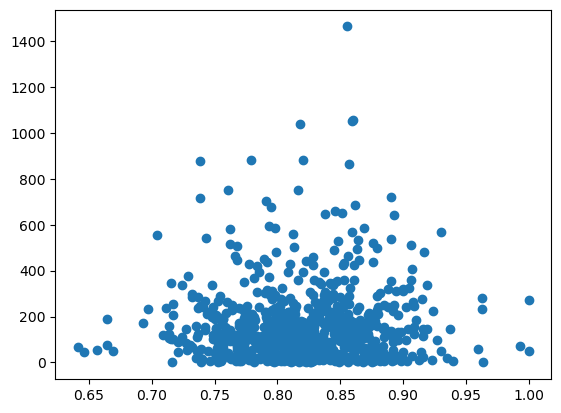

In [8]:
plt.scatter(df["semantic neu score"], df["avg_time"])

In [9]:
df[df["semantic compound score"] < 0].describe()

,index,Unnamed: 0,pageviews,unique_pageviews,avg_time,bounce_rate,exit%,semantic neg score,semantic neu score,semantic pos score,semantic compound score,average_sentence_length,dale_chall,flesch,average_stopword
count,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,539.80000,541.666667,246.733333,224.533333,179.719753,0.593791,0.552778,0.077067,0.864133,0.058600,-0.712593,19.909995,10.279333,49.492667,6.903464
std,223.42183,224.232554,473.231062,426.257278,176.553923,0.262655,0.264731,0.045965,0.076257,0.032262,0.279740,6.562669,2.809945,14.762865,3.876999
min,2.00000,3.000000,1.000000,1.000000,0.000000,0.000000,0.200000,0.007000,0.704000,0.000000,-0.997400,11.493151,7.810000,13.040000,0.800000
25%,458.50000,459.500000,11.500000,11.000000,63.676109,0.400461,0.316667,0.040500,0.812000,0.028500,-0.934250,15.673732,8.160000,44.780000,5.199157
50%,561.00000,562.000000,31.000000,31.000000,147.608943,0.681818,0.571429,0.077000,0.845000,0.069000,-0.752500,17.717949,9.220000,53.920000,6.829787
75%,694.50000,696.500000,78.000000,72.000000,232.433573,0.755806,0.739118,0.102500,0.930500,0.083000,-0.636200,22.146055,11.800000,56.655000,8.081023
max,771.00000,775.000000,1558.000000,1380.000000,554.866071,1.000000,1.000000,0.193000,0.993000,0.103000,-0.190100,35.500000,16.240000,66.070000,17.000000


In [10]:
df[df["semantic compound score"] < 0.5].iloc[:]["url"]

2           blog/uncertainty-in-business-volatile-market
228    blog/serverless-camunda-terraform-recipe-using...
279                  blog/car-makers-and-their-ecosystem
423                           blog/hate-speech-detection
494                    blog/be-a-senior-every-day-part-i
535                         blog/playful-curious-digital
557                                   blog/fosdem-haikus
561                                blog/friday-literally
640                             blog/programmer-proverbs
673           blog/futurice-helsinki-will-move-to-kamppi
691    blog/houkutteleva-tietoyhteiskunta-ei-tuijota-...
692                      blog/intelligent-authentication
697    blog/android-unit-testing-in-android-studio-an...
725    blog/a-story-about-design-decisions-and-legacy...
729              blog/9-steps-of-digital-magazine-design
741    blog/julkishallinnon-tietotekniikka-on-paivite...
753                         blog/useful-django-resources
771         blog/first-year-in-